<a href="https://colab.research.google.com/github/sakshantG/Bike-Sharing-Demand-Prediction---Regression/blob/main/Final_Sakshant_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Seoul Bike Sharing Demand Prediction**



##### **Project Type**    - **Regression**
##### **Contribution**    - Individual

# **Project Summary -**

Bike-sharing system is a shared micro mobility service for short term bike rental. The
service can be free of charge (e.g., paid by a city) or offered for a price. There are
around 2000 bike-sharing services available around the world, mostly based in
cities.In this project, we were provided with the dataset of seoul city on which we tried
to predict rented bike count per hour by fitting various algorithms on the dataset which
was given to us.

# **GitHub Link -**

GitHub link - https://github.com/sakshantG 

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes** **bold text**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

##**Data Description** 
##**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

###**Attribute Information:** 

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## ***1. Know Your Data***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle':'--'})
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [3]:
# Loading Dataset

bike_df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding= 'unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

# computing number of rows
rows = len(bike_df.axes[0])

# computing number of columns
columns = len(bike_df.axes[1])

print("Number of Rows :",rows)
print("Number of Columns :",columns)

Number of Rows : 8760
Number of Columns : 14


### Dataset Information

This dataset contains the data of rented bike count in the city of seoul. It presents the count of bikes rented per hour and the weather conditions for the day. The data is of one year from December 2017 to November 2018.

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Above we can see there are no missing values as well as no duplicate values in the dataset.**

###**In the given dataset there are total 14 columns and most of them have 0 null values.**

### What did you know about your dataset?

In this Dataset, we have 8760 rows and 14 columns from which "rented bike count" is our target variable. There are numerical variables as well as categorical variables and one date variable which is stored as object so we will need to convert its dtype.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns

bike_df.columns=map(str.lower, bike_df.columns)
bike_df.columns

Index(['date', 'rented bike count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind speed (m/s)', 'visibility (10m)', 'dew point temperature(°c)',
       'solar radiation (mj/m2)', 'rainfall(mm)', 'snowfall (cm)', 'seasons',
       'holiday', 'functioning day'],
      dtype='object')

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented bike count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind speed (m/s)           8760 non-null   float64
 6   visibility (10m)           8760 non-null   int64  
 7   dew point temperature(°c)  8760 non-null   float64
 8   solar radiation (mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall (cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning day            8760 non-null   objec

## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# converting the dtype of date column
def get_date(str_date):
  date_obj= dt.datetime.strptime(str_date,'%d/%m/%Y')
  date_obj = pd.to_datetime(date_obj.date(), format="%Y-%m-%d")
  return date_obj

bike_df['date'] = bike_df['date'].apply(get_date)

In [11]:
# extracting thr day, month and day of the week 

bike_df['day'] = bike_df['date'].apply(lambda x : x.day)
bike_df['month'] = bike_df['date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['date'].dt.day_name()

bike_df = bike_df.drop("date", axis=1)

bike_df.head()


rented bike count  hour  temperature(°c)  humidity(%)  wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   visibility (10m)  dew point temperature(°c)  solar radiation (mj/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   rainfall(mm)  snowfall (cm) seasons     holiday functioning day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month day_of_week  
0     12      Friday  
1     12      Friday  
2     12      Friday  
3     12      Friday  
4     12      Friday

In [12]:
# Dataset Describe
bike_df.describe(include='all')

rented bike count         hour  temperature(°c)  humidity(%)  \
count         8760.000000  8760.000000      8760.000000  8760.000000   
unique                NaN          NaN              NaN          NaN   
top                   NaN          NaN              NaN          NaN   
freq                  NaN          NaN              NaN          NaN   
mean           704.602055    11.500000        12.882922    58.226256   
std            644.997468     6.922582        11.944825    20.362413   
min              0.000000     0.000000       -17.800000     0.000000   
25%            191.000000     5.750000         3.500000    42.000000   
50%            504.500000    11.500000        13.700000    57.000000   
75%           1065.250000    17.250000        22.500000    74.000000   
max           3556.000000    23.000000        39.400000    98.000000   

        wind speed (m/s)  visibility (10m)  dew point temperature(°c)  \
count        8760.000000       8760.000000                8760.000000   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean            1.724909       1436.825799                   4.073813   
std             1.036300        608.298712                  13.060369   
min             0.000000         27.000000                 -30.600000   
25%             0.900000        940.000000                  -4.700000   
50%             1.500000       1698.000000                   5.100000   
75%             2.300000       2000.000000                  14.800000   
max             7.400000       2000.000000                  27.200000   

        solar radiation (mj/m2)  rainfall(mm)  snowfall (cm) seasons  \
count               8760.000000   8760.000000    8760.000000    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                   0.569111      0.148687       0.075068     NaN   
std                    0.868746      1.128193       0.436746     NaN   
min                    0.000000      0.000000       0.000000     NaN   
25%                    0.000000      0.000000       0.000000     NaN   
50%                    0.010000      0.000000       0.000000     NaN   
75%                    0.930000      0.000000       0.000000     NaN   
max                    3.520000     35.000000       8.800000     NaN   

           holiday functioning day          day        month day_of_week  
count         8760            8760  8760.000000  8760.000000        8760  
unique           2               2          NaN          NaN           7  
top     No Holiday             Yes          NaN          NaN      Friday  
freq          8328            8465          NaN          NaN        1272  
mean           NaN             NaN    15.720548     6.526027         NaN  
std            NaN             NaN     8.796749     3.448048         NaN  
min            NaN             NaN     1.000000     1.000000         NaN  
25%            NaN             NaN     8.000000     4.000000         NaN  
50%            NaN             NaN    16.000000     7.000000         NaN  
75%            NaN             NaN    23.000000    10.000000         NaN  
max            NaN             NaN    31.000000    12.000000         NaN

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
bike_df.nunique()

rented bike count            2166
hour                           24
temperature(°c)               546
humidity(%)                    90
wind speed (m/s)               65
visibility (10m)             1789
dew point temperature(°c)     556
solar radiation (mj/m2)       345
rainfall(mm)                   61
snowfall (cm)                  51
seasons                         4
holiday                         2
functioning day                 2
day                            31
month                          12
day_of_week                     7
dtype: int64

### What all manipulations have you done and insights you found?

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Dependent Variable**

First we will start with analyzing our target variable which is **rented bike count**.

#### Chart - 1

In [14]:
# dependent variable "rented bike count"
dependent_var = "rented bike count"

In [15]:
bike_df[dependent_var].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: rented bike count, dtype: float64

Now let's see the distribution of dependent variables 'rented bike count'

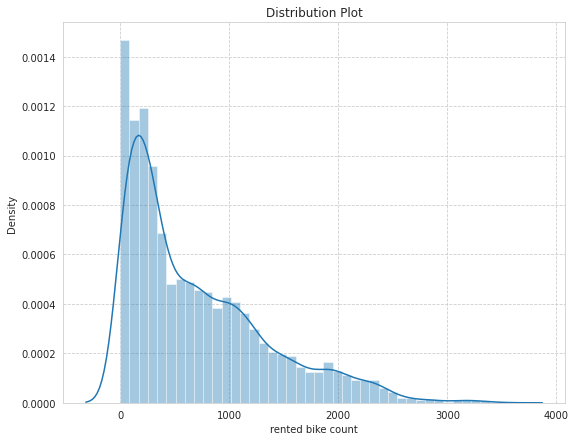

In [16]:
# distribution plot,
plt.figure(figsize=(9,7))
sns.distplot(bike_df[dependent_var])
plt.title("Distribution Plot")
plt.show()

##### 1. Why did you pick the specific chart?

* Use this chart in order to get the how the Depedent variables(rented bike count) are dsitributed along the Independent features.
* Above we can see that Dependent variable is rightly skewed.

##### 2. What is/are the insight(s) found from the chart?

Dependent variable i.e rented bike count is slightly skewed towards right side (positively skewed). So we will apply transformation and again look at the distribution.

Below are some transformation technique to reduce skewness.

<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

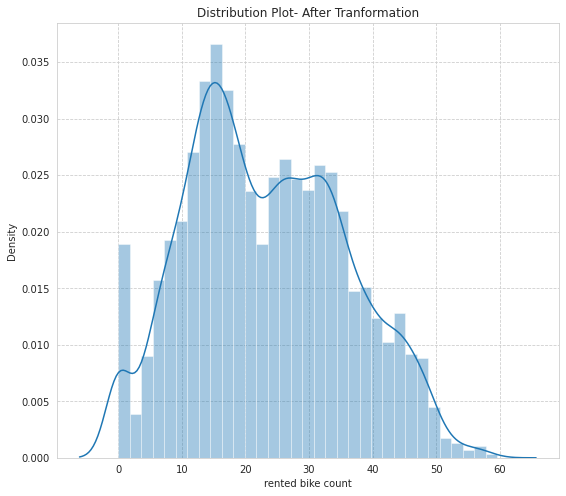

In [17]:
# applying square-root transformation

plt.figure(figsize=(9,8))
sns.distplot(np.sqrt(bike_df[dependent_var]))
plt.title("Distribution Plot- After Tranformation")
plt.show()

It looks good and almost near to the normal distribution

#### Chart - 2

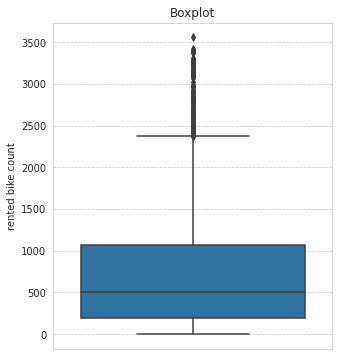

In [18]:
# Chart - 2 - Boxplot
plt.figure(figsize=(5,6))
sns.boxplot(y=bike_df[dependent_var])
plt.title("Boxplot")
plt.show()

##### 1. Why did you pick the specific chart?

From boxplot, we can see the median value of rented bike count is near 500 and there are some outliers towards upper limit. After applying transformation there will be no outliers.

## **Independent Variables**

## **Numerical Variables**

Noe let's have a look at the numerical features and plot some graphs to understand them

In [19]:
# numerical variables
numerical_var = list(bike_df.describe().columns[1:])
numerical_var

['hour',
 'temperature(°c)',
 'humidity(%)',
 'wind speed (m/s)',
 'visibility (10m)',
 'dew point temperature(°c)',
 'solar radiation (mj/m2)',
 'rainfall(mm)',
 'snowfall (cm)',
 'day',
 'month']

In [20]:
bike_df[numerical_var].describe().T

count         mean         std   min     25%  \
hour                       8760.0    11.500000    6.922582   0.0    5.75   
temperature(°c)            8760.0    12.882922   11.944825 -17.8    3.50   
humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
dew point temperature(°c)  8760.0     4.073813   13.060369 -30.6   -4.70   
solar radiation (mj/m2)    8760.0     0.569111    0.868746   0.0    0.00   
rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   
day                        8760.0    15.720548    8.796749   1.0    8.00   
month                      8760.0     6.526027    3.448048   1.0    4.00   

                               50%      75%      max  
hour                         11.50    17.25    23.00  
temperature(°c)              13.70    22.50    39.40  
humidity(%)                  57.00    74.00    98.00  
wind speed (m/s)              1.50     2.30     7.40  
visibility (10m)           1698.00  2000.00  2000.00  
dew point temperature(°c)     5.10    14.80    27.20  
solar radiation (mj/m2)       0.01     0.93     3.52  
rainfall(mm)                  0.00     0.00    35.00  
snowfall (cm)                 0.00     0.00     8.80  
day                          16.00    23.00    31.00  
month                         7.00    10.00    12.00

In [21]:
# unique count of numerial variables

lst = []
for col in numerical_var:
  lst.append(bike_df[col].nunique())

unique_cnt_df = pd.DataFrame(index= numerical_var, columns=['unique_count'])
unique_cnt_df['unique_count']= lst
unique_cnt_df  

unique_count
hour                                 24
temperature(°c)                     546
humidity(%)                          90
wind speed (m/s)                     65
visibility (10m)                   1789
dew point temperature(°c)           556
solar radiation (mj/m2)             345
rainfall(mm)                         61
snowfall (cm)                        51
day                                  31
month                                12

#### Chart - 3

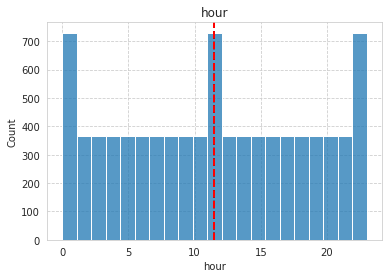

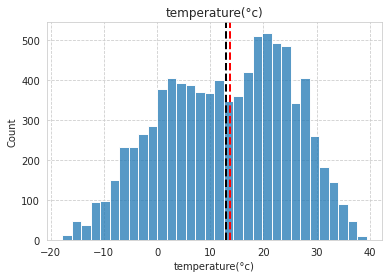

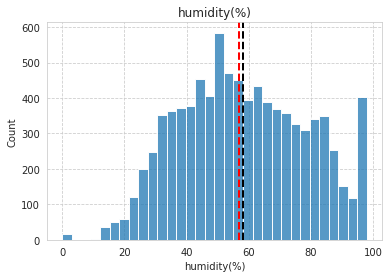

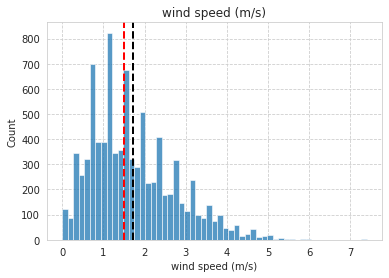

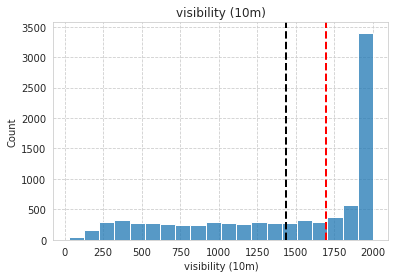

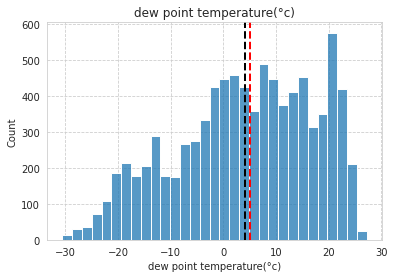

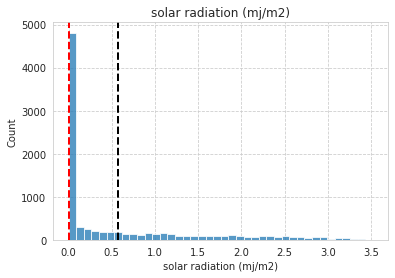

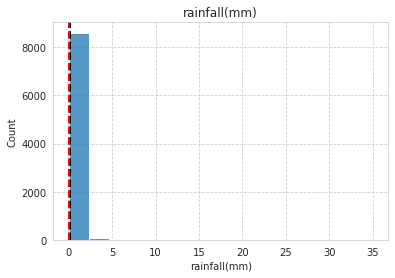

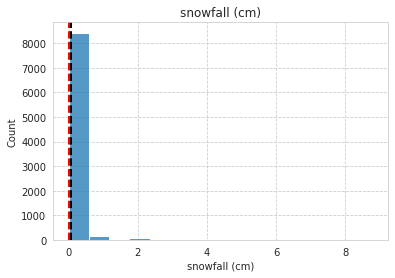

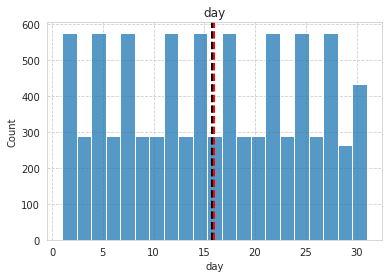

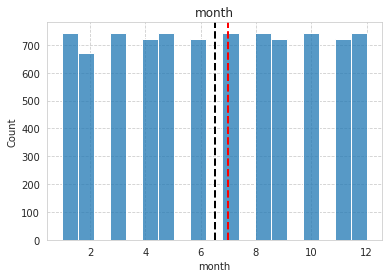

In [22]:
# Chart - 3 
for col in numerical_var:
  features = bike_df[col]
  sns.histplot(features)
  plt.axvline(features.mean(), color='black', linestyle='dashed', linewidth=2)
  plt.axvline(features.median(), color='red', linestyle='dashed', linewidth=2)
  plt.title(col)
  plt.show()

#### Chart - 4

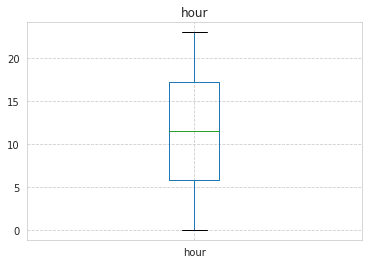

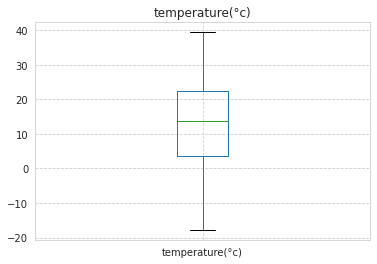

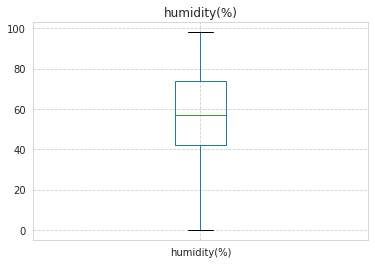

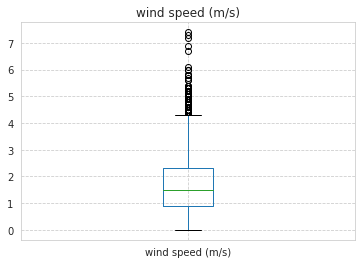

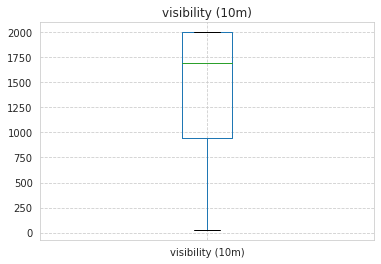

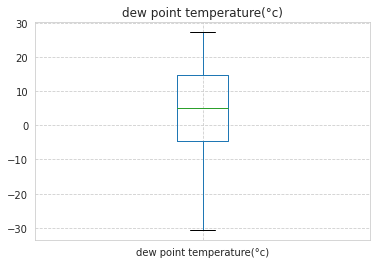

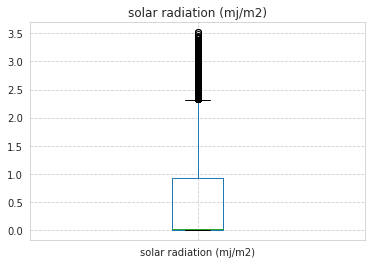

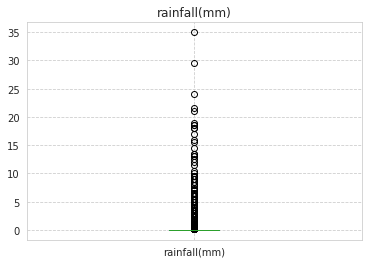

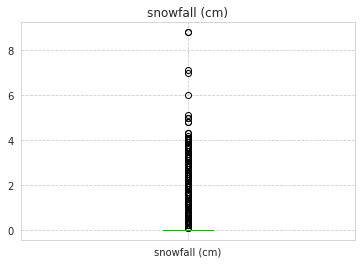

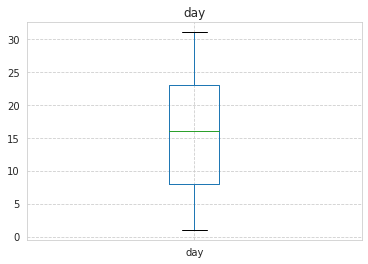

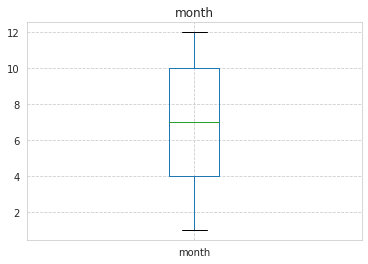

In [23]:
# Chart - 4 
# boxplot for each numerica features

for col in numerical_var:
  fig = plt.figure()
  ax = fig.gca()
  bike_df.boxplot(col, ax= ax)
  ax.set_title(col)
plt.show()  

Variables such as wind speed (m/s), solar radiation (mj/m2), rainfall(mm), snowfall (cm) has outliers as seen in the boxplot.

## **Categorical Variables**

In [24]:
categorical_var =list(bike_df.select_dtypes(include= 'object'))
categorical_var 

['seasons', 'holiday', 'functioning day', 'day_of_week']

In [25]:
# Season column
print(f"Count of distinct categories in season variable: {bike_df['seasons'].nunique()}")
print(list(bike_df["seasons"].unique()))

Count of distinct categories in season variable: 4
['Winter', 'Spring', 'Summer', 'Autumn']


In [26]:
# Holiday column
print(f"Count of distinct categories in holiday variable: {bike_df['holiday'].nunique()}")
print(list(bike_df['holiday'].unique()))

Count of distinct categories in holiday variable: 2
['No Holiday', 'Holiday']


In [27]:
# functioning day column
print(f"Count of distinct categories in functioning day variable: {bike_df['functioning day'].nunique()}")
print(list(bike_df['functioning day'].unique()))

Count of distinct categories in functioning day variable: 2
['Yes', 'No']


#### Chart - 5

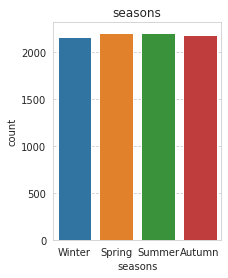

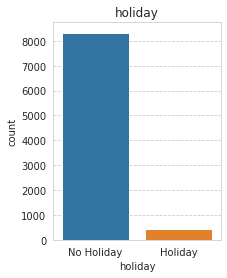

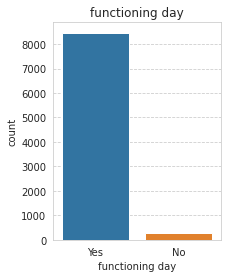

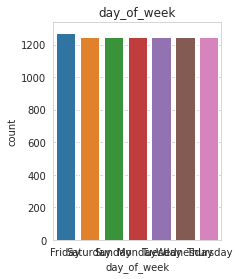

In [28]:
# Chart - 5 
# count plot for the categorical features

for col in categorical_var:
  plt.figure(figsize=(3,4))
  sns.countplot(data=bike_df, x= col)
  plt.title(col)
  plt.show()

There are very less count of Holiday and No functioning day. 

##### 2. What is/are the insight(s) found from the chart?

Answer - We can say that this columns will not have a greater impact.

# **Bivariate Analysis**

## Numerical variabels vs rented bike count

#### Chart - 6

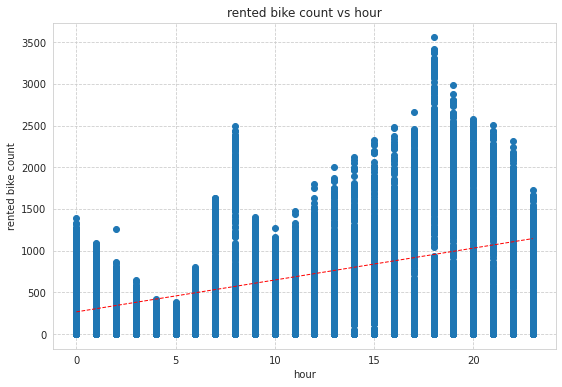

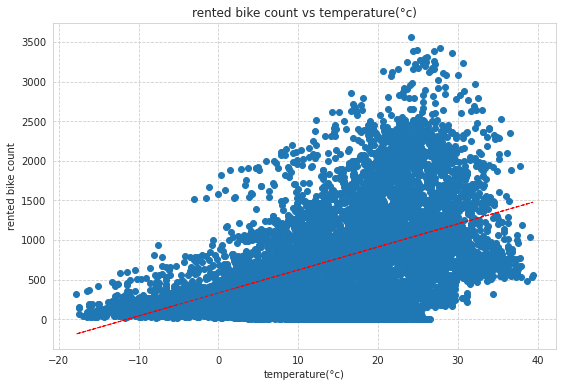

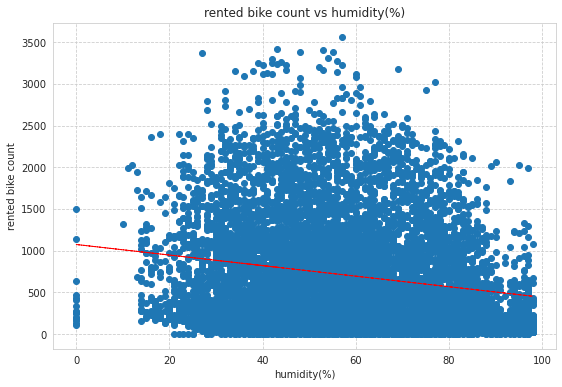

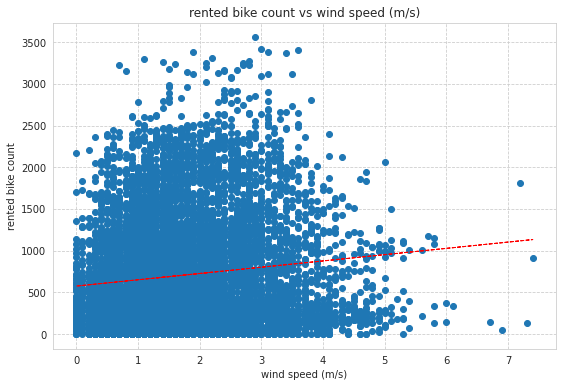

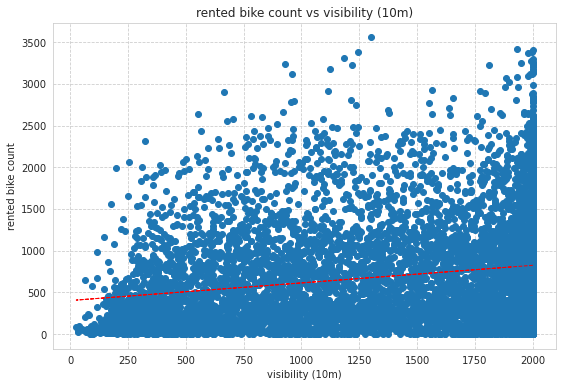

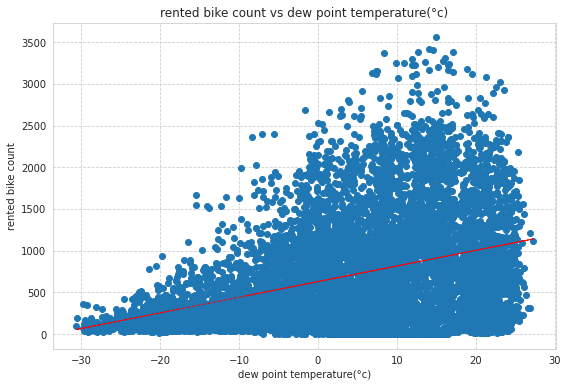

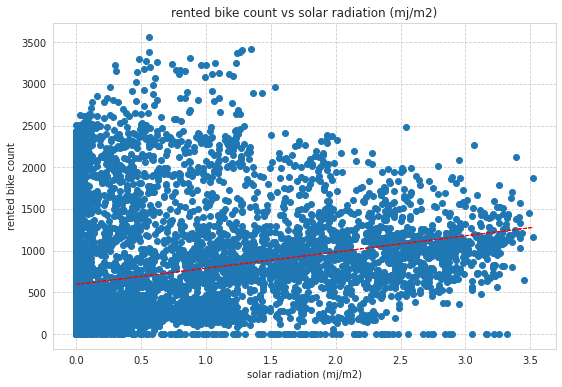

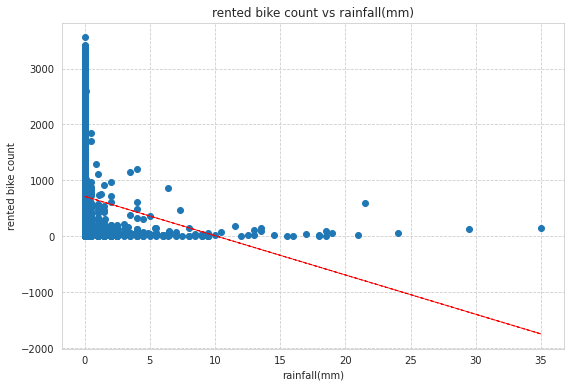

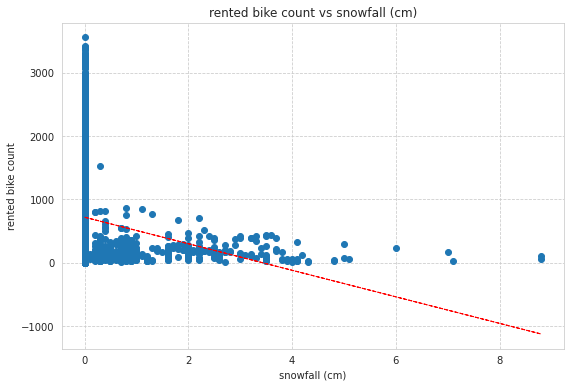

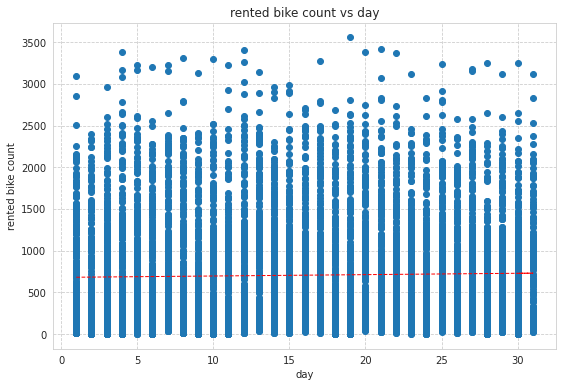

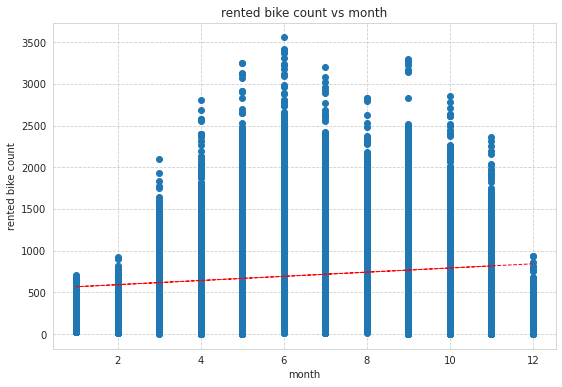

In [29]:
# Chart - 6  Scatter-plot of numerical_ver vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = bike_df[col]
  label = bike_df['rented bike count']
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('rented bike count')
  ax.set_title('rented bike count vs ' + col)

  z = np.polyfit(bike_df[col], bike_df['rented bike count'], 1)
  y_hat = np.poly1d(z)(bike_df[col])

  plt.plot(bike_df[col], y_hat, "r--", lw=1)

plt.show()



#### Chart - 7

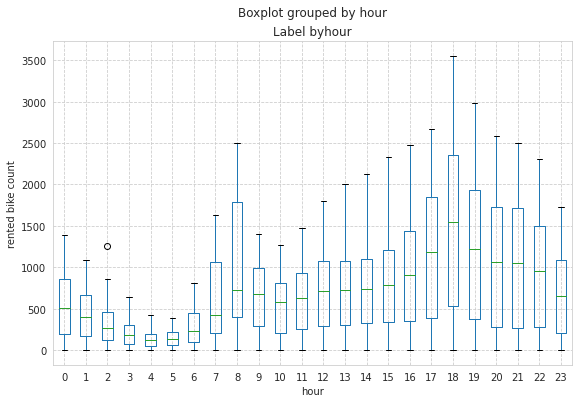

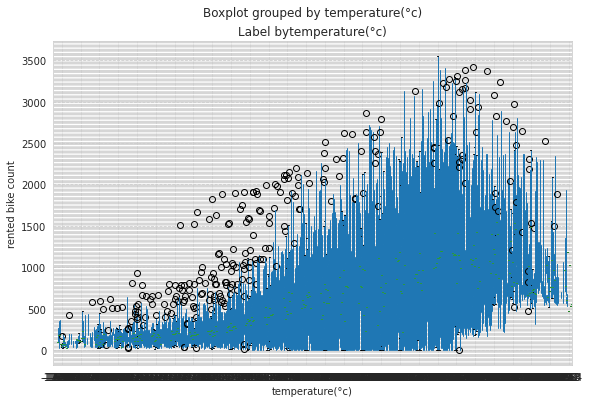

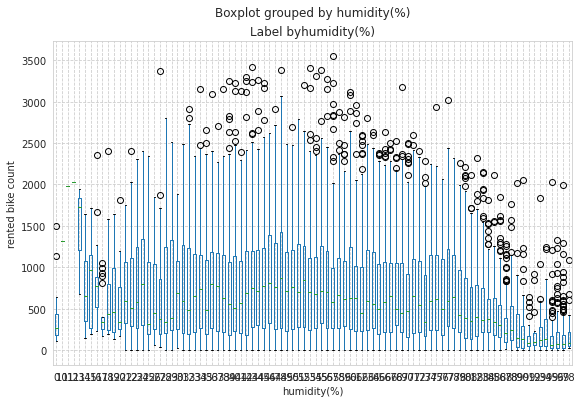

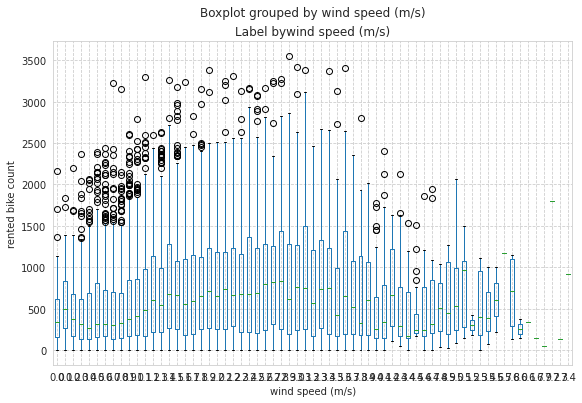

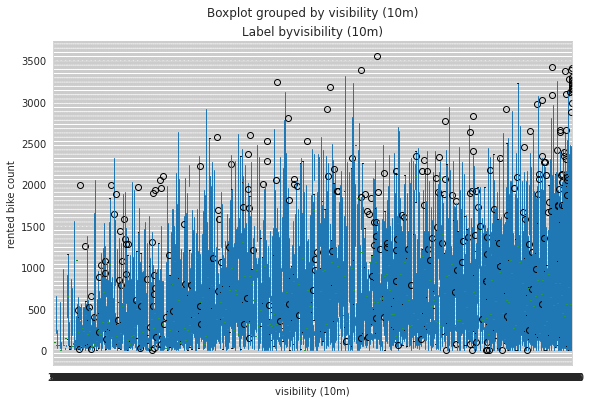

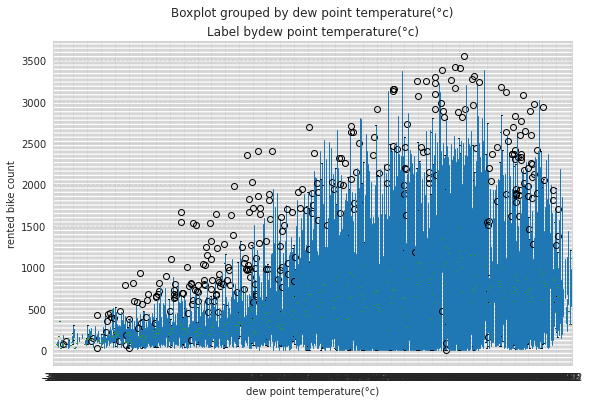

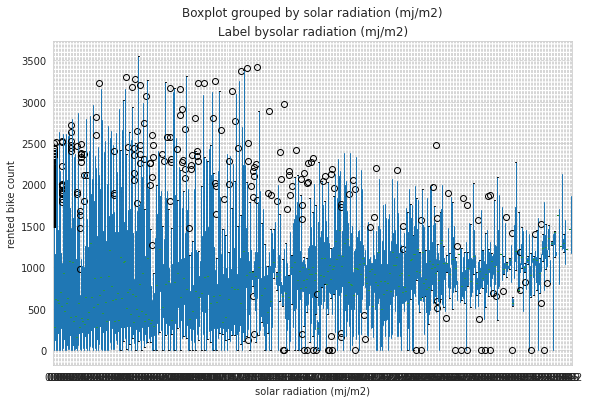

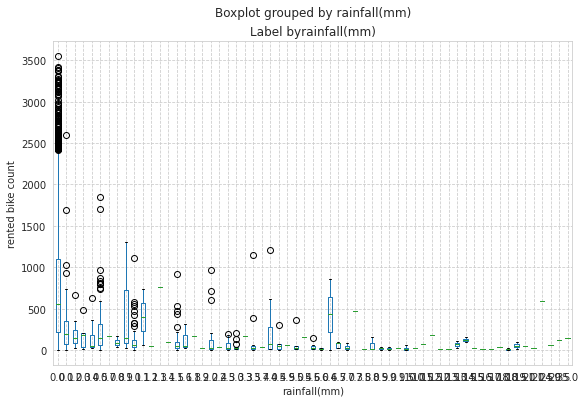

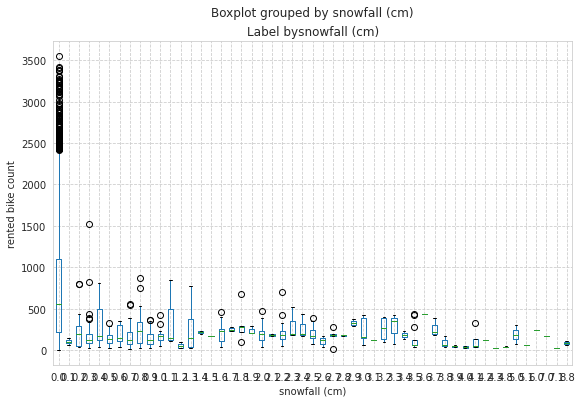

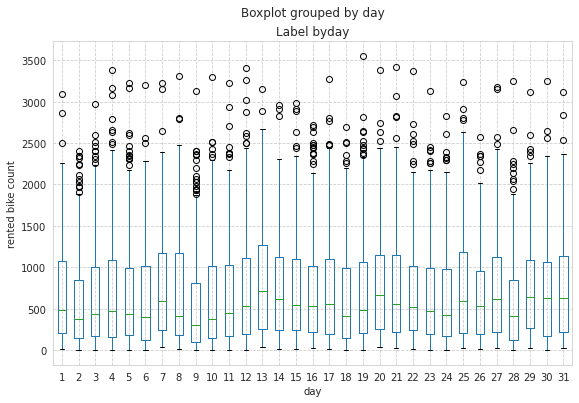

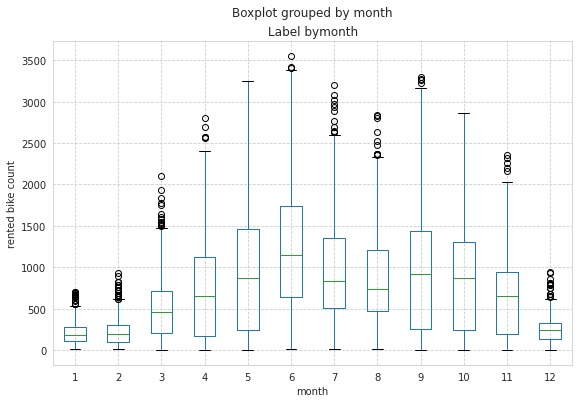

In [30]:
# Chart - 7 Boxplot of numerical_ver vs rented bike count

for col in numerical_var:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  bike_df.boxplot(column='rented bike count', by=col, ax= ax)
  ax.set_title('Label by' + col)
  ax.set_ylabel("rented bike count")
plt.show()  

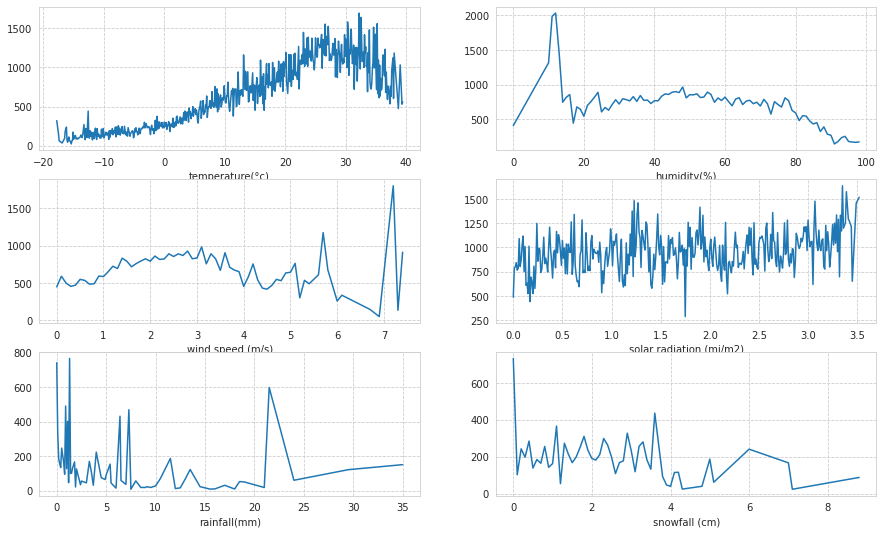

In [31]:
# Chart 8 - Lineplot numerical_var vs rented bike count

fig, ax = plt.subplots(3,2,figsize=(15,9))

bike_df.groupby('temperature(°c)').mean()['rented bike count'].plot(ax=ax[0][0])

bike_df.groupby('humidity(%)').mean()['rented bike count'].plot(ax=ax[0][1])

bike_df.groupby('wind speed (m/s)').mean()['rented bike count'].plot(ax=ax[1][0])

bike_df.groupby('solar radiation (mj/m2)').mean()['rented bike count'].plot(ax=ax[1][1])

bike_df.groupby('rainfall(mm)').mean()['rented bike count'].plot(ax=ax[2][0])

bike_df.groupby('snowfall (cm)').mean()['rented bike count'].plot(ax=ax[2][1])

plt.show()

##### 1. Why did you pick the specific chart?

* we use line plot to see the trend of numerical variables with respect to the rented bike count.
* means to see the count of rented bikes affected by the temperature, humidity, solar radiations, rainfaal, wind-speed and snowfall.

##### 2. What is/are the insight(s) found from the chart?

* When the temperature is more the rental bike count is also high. 
* With increase in humidity the demand of rental bikes decreases. 
* Wind speed and solar radiation do not have much impact on the bike count. 
* When there is more than 10mm rainfall the demand of bike decreases but above 20mm of rain there is a huge peak. This could be the outlier or rainfall in the Summer.
* With increase in snowfall there is a decrease in rented bike count.

#### Chart - 9

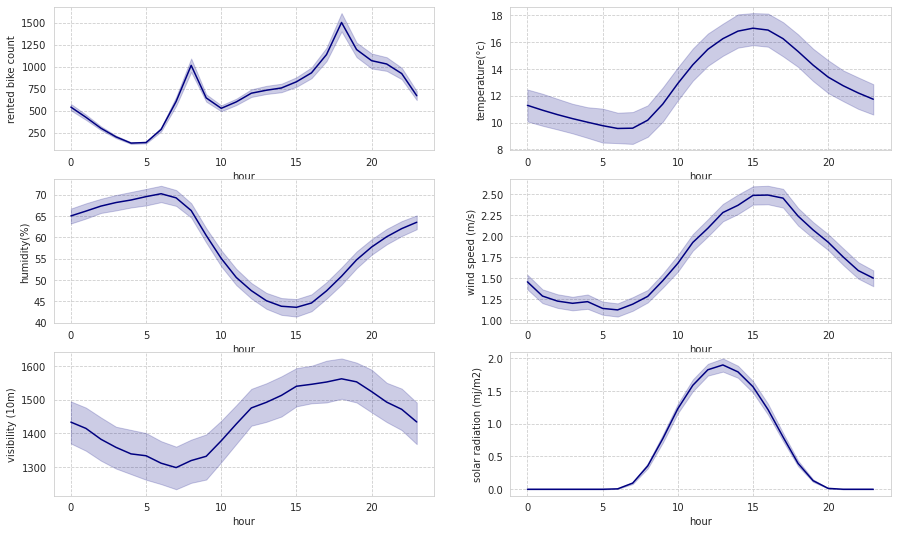

In [32]:
# Spread of numerical variables across hours
fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('hour', 'rented bike count', data=bike_df, color='Navy', ax=ax[0][0])

sns.lineplot('hour', 'temperature(°c)', data=bike_df, color='Navy', ax=ax[0][1])

sns.lineplot('hour', 'humidity(%)', data=bike_df, color='Navy', ax=ax[1][0])

sns.lineplot('hour', 'wind speed (m/s)', data=bike_df, color='Navy', ax=ax[1][1])

sns.lineplot('hour', 'visibility (10m)', data=bike_df, color='Navy', ax=ax[2][0])

sns.lineplot('hour', 'solar radiation (mj/m2)', data=bike_df, color='Navy', ax=ax[2][1])

plt.show()

##### 1. What is/are the insight(s) found from the chart?


* At the beginning of the day the demand of rental bike increases with the highest peak in the evening and later decreasing.
* The demand of rental bike is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Temperature, wind speed, solar radiation also increases and are at the peak in afternoon.

#### Chart - 10

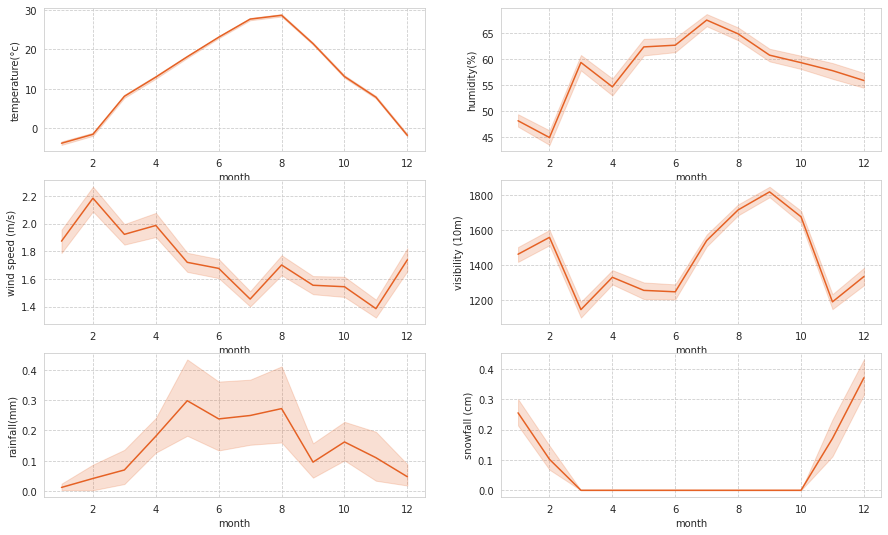

In [33]:
# Chart - 10 spread of numerical_var accorss months

fig, ax = plt.subplots(3,2,figsize=(15,9))

sns.lineplot('month', 'temperature(°c)', data=bike_df, color='#E56124', ax=ax[0][0])

sns.lineplot('month', 'humidity(%)', data=bike_df, color='#E56124', ax=ax[0][1])

sns.lineplot('month', 'wind speed (m/s)', data=bike_df, color='#E56124', ax=ax[1][0])

sns.lineplot('month', 'visibility (10m)', data=bike_df, color='#E56124', ax=ax[1][1])

sns.lineplot('month', 'rainfall(mm)', data=bike_df, color='#E56124', ax=ax[2][0])

sns.lineplot('month', 'snowfall (cm)', data=bike_df, color='#E56124', ax=ax[2][1])

plt.show()


#### Chart - 11

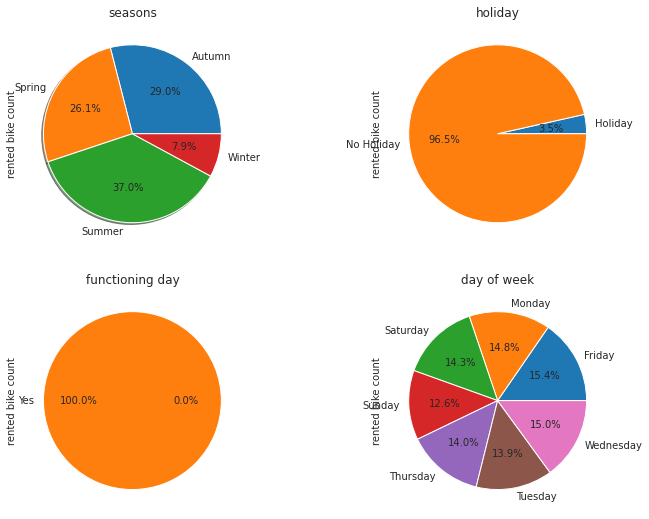

In [34]:
# Chart - 11 
# Pie chart Categorical_var vs rented bike count

fig, ax = plt.subplots(2,2,figsize=(12,9))

bike_df.groupby('seasons').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', shadow=True,ax= ax[0][0])
ax[0][0].set_title("seasons")

bike_df.groupby('holiday').sum()['rented bike count'].plot.pie(autopct='%1.1f%%',ax= ax[0][1])
ax[0][1].set_title("holiday")

bike_df.groupby('functioning day').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][0])
ax[1][0].set_title("functioning day")

bike_df.groupby('day_of_week').sum()['rented bike count'].plot.pie(autopct='%1.1f%%', ax= ax[1][1])
ax[1][1].set_title("day of week")

plt.show()

##### 2. What is/are the insight(s) found from the chart?

* Above we can see Autumn, Spring and Summer this three seasons has the highest demand of rented bikes.
* on working days there is approximately 97% demand of the rent bikes beccause we can say that people use this rented bike services in order to go to office, etc works, and we can predict that peoples generally on holdays prefer to stay at home or prefer there own vehicles.


#### Chart - 12

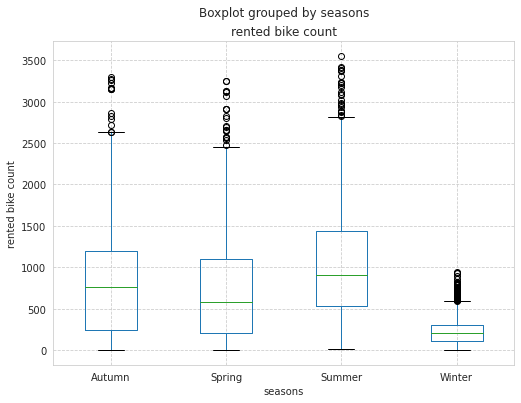

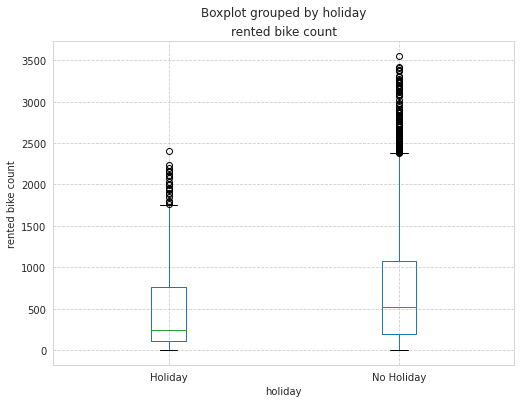

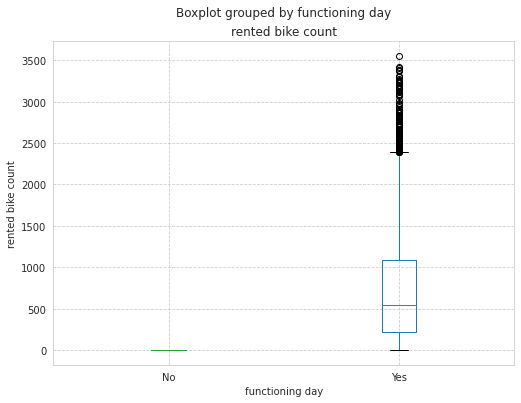

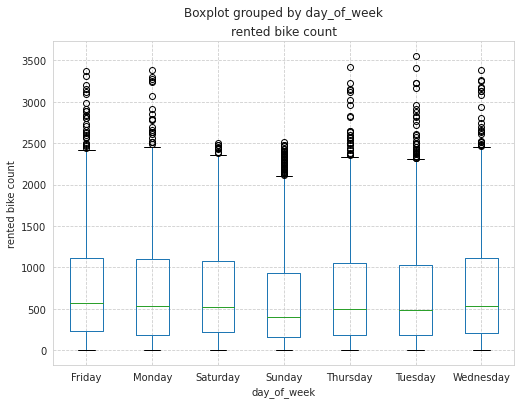

In [35]:
# Chart - 12 
# Boxplot of categorical_var vs rented bike count

for col in categorical_var:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  bike_df.boxplot(column= 'rented bike count', by = col, ax = ax)
  ax.set_ylabel("rented bike count")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

* In Summer the demand of rented bike is high because temperature and solar radiation is high in summer. 
* We have seen there are less holidays so obviously rented bike count is also less on holidays. 
* Almost no demand on non functioning day.
* The demand of rental bikes slightly decreases on weekend days i.e saturday and sunday.

#### Chart - 13

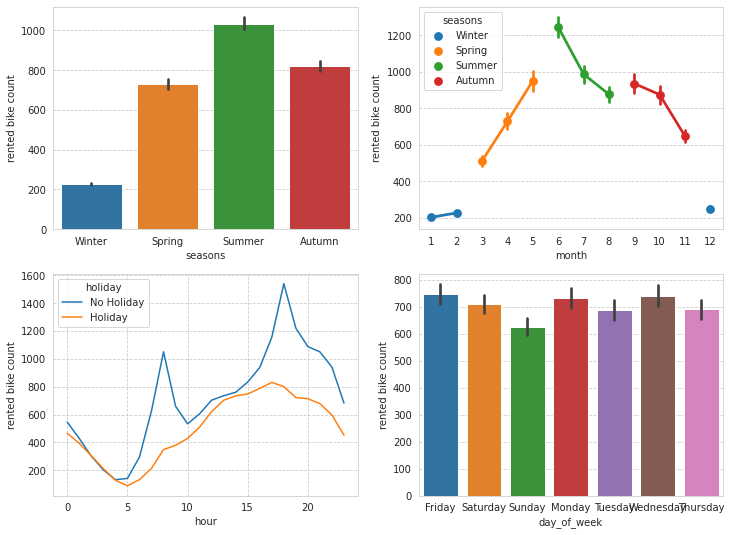

In [36]:
# Chart - 13 
# spread of rented bike count across categorical_var
fig, ax = plt.subplots(2,2,figsize=(12,9))

sns.barplot(x= 'seasons', y= 'rented bike count', data= bike_df, ax= ax[0][0])

sns.pointplot(x= 'month', y= 'rented bike count', hue= 'seasons',
              data= bike_df, ax= ax[0][1])

sns.lineplot(x= 'hour', y= 'rented bike count', hue= 'holiday',
             ci=None, data= bike_df, ax= ax[1][0])

sns.barplot(x= 'day_of_week', y= 'rented bike count', data= bike_df, ax= ax[1][1])

plt.show()

##### 2. What is/are the insight(s) found from the chart?

* There is a huge demand for bike rents in summer season while the least bike rents occur in winter.
* We can see there is a high demand for rented bike in the month of June, August and less demand in the month of December, January and February i.e winter season.
* Non holidays have comparatively high demand for rented bikes as compared to holidays. 
* There is a high demand for rented bikes during office days and demand decreases slightly on Sunday.


# **Feature Selection**

## **Correlation**

#### Chart - 14 - Correlation Heatmap

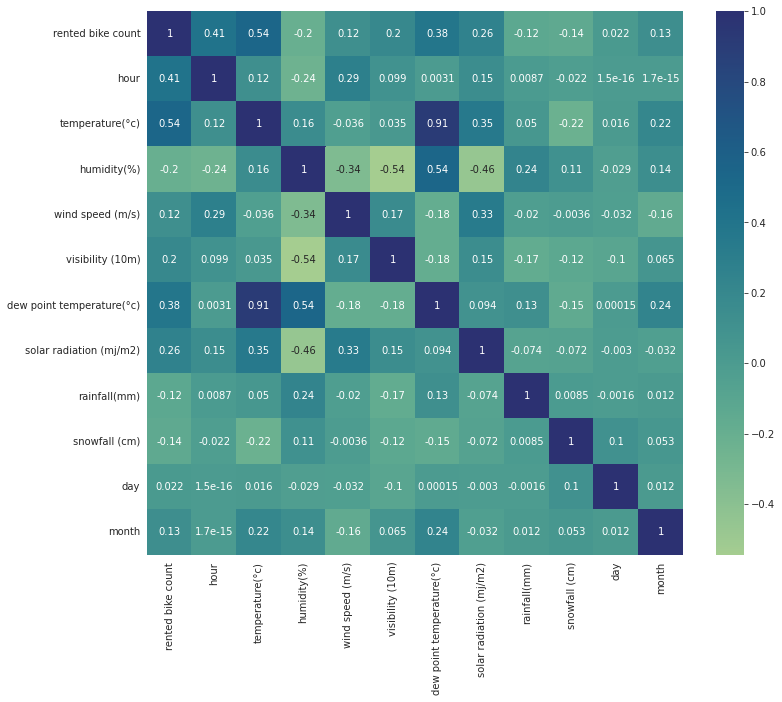

In [37]:
# Correlation Heatmap visualization code

corr_df = bike_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot =True, cmap ="crest" )
plt.show()

##### What is/are the insight(s) found from the chart?

The most correlated features to the rented bike count are:
* hour
* temperature(°c)
* dew point temperature(°c)
* solar radiation (mj/m2)

There is a high correlation between dew point temperature(°c) and temperature(°c).

# **Detecting Multicollinearity using VIF**

In [38]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [39]:
calc_vif(bike_df[[i for i in numerical_var]])

variables        VIF
0                        hour   4.425960
1             temperature(°c)  38.389623
2                 humidity(%)   8.344305
3            wind speed (m/s)   4.879565
4            visibility (10m)   9.481423
5   dew point temperature(°c)  19.815223
6     solar radiation (mj/m2)   2.900819
7                rainfall(mm)   1.082134
8               snowfall (cm)   1.144168
9                         day   4.292003
10                      month   5.096115

##### 1. Why did you pick the specific chart?

* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

##### 2. What is/are the insight(s) found from the chart?

* We can see here that 'dew point temperature(°c)', 'temperature(°c)' have a high VIF value, meaning they can be predicted by other independent variables in the dataset. These two variables are highly correlated.

* Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features.

In [40]:
# droping 'dew point temperature(°c)', 'day', 'month'

calc_vif(bike_df[[ i for i in numerical_var if i not in ['dew point temperature(°c)', 'day', 'month']]])

variables       VIF
0                     hour  3.921832
1          temperature(°c)  3.228318
2              humidity(%)  4.868221
3         wind speed (m/s)  4.608625
4         visibility (10m)  4.710170
5  solar radiation (mj/m2)  2.246791
6             rainfall(mm)  1.079158
7            snowfall (cm)  1.120579

* After droping 'dew point temperature(°c)', 'day' and 'month', VIF values for all features have decreased less than 5 that is good to build regression model.

In [41]:
# droping 'dew point temperature(°c)', 'day', 'month' from original dataset
data= bike_df.drop(['dew point temperature(°c)', 'day', 'month'], axis=1)

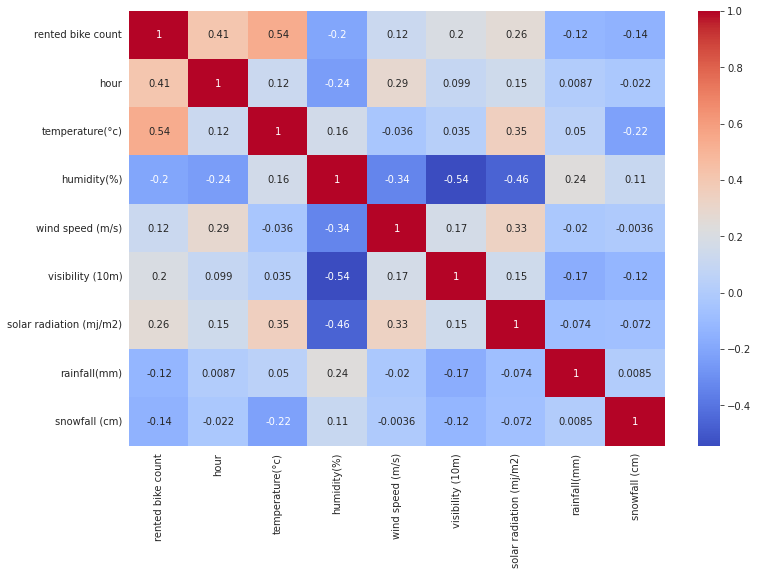

In [42]:
# Correlation Heatmap after reducing the multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 3. Categorical Encoding

In [43]:
# creating column of weekend  by replacing the days with 1 and 0
data['weekend'] = data['day_of_week'].apply(lambda x : 1 if x == 'Sunday' or x == 'Saturday' else 0)
data.drop('day_of_week', axis = 1, inplace= True)

In [44]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

data[['seasons', 'holiday', 'functioning day']] = data[['seasons', 'holiday', 'functioning day']].apply(label_en.fit_transform)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer - Above we pweformed label encoding in order to convert categorical variables into numericals which helps us makes easier for using various models 

In [45]:
data.head()

rented bike count  hour  temperature(°c)  humidity(%)  wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   visibility (10m)  solar radiation (mj/m2)  rainfall(mm)  snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   seasons  holiday  functioning day  weekend  
0        3        1                1        0  
1        3        1                1        0  
2        3        1                1        0  
3        3        1                1        0  
4        3        1                1        0

### **Data Splitting**
* we first separate the entire data into X & y i.e. into independent and dependent variables.

In [46]:
X = data.iloc[:,1:]
y = np.sqrt(data.iloc[:,0])

In [47]:
X.head()

hour  temperature(°c)  humidity(%)  wind speed (m/s)  visibility (10m)  \
0     0             -5.2           37               2.2              2000   
1     1             -5.5           38               0.8              2000   
2     2             -6.0           39               1.0              2000   
3     3             -6.2           40               0.9              2000   
4     4             -6.0           36               2.3              2000   

   solar radiation (mj/m2)  rainfall(mm)  snowfall (cm)  seasons  holiday  \
0                      0.0           0.0            0.0        3        1   
1                      0.0           0.0            0.0        3        1   
2                      0.0           0.0            0.0        3        1   
3                      0.0           0.0            0.0        3        1   
4                      0.0           0.0            0.0        3        1   

   functioning day  weekend  
0                1        0  
1                1        0  
2                1        0  
3                1        0  
4                1        0

In [48]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rented bike count, dtype: float64

In [49]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0 )

##### What data splitting ratio have you used and why? 
Answer - Above we split the data in to 70:30 ratio .i.e. 70% of the data used for training purpose and 30% of the data will be used for testing.

In [50]:
print(X_train.shape, y_train.shape)

(6132, 12) (6132,)


In [51]:
print(X_test.shape, y_test.shape)

(2628, 12) (2628,)


## ***ML Model Implementation***

### ***ML Model - 1***

# **Linear Regression**

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# create an instance of Linear Regression
linear_reg = LinearRegression()

# fitting the Linear regrssion model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
# model score
linear_reg.score(X_train, y_train)

0.6540967727241054

In [55]:
linear_reg.coef_

array([ 4.78038514e-01,  5.56795645e-01, -1.57744402e-01,  4.32489954e-02,
        4.02047244e-04, -9.92946769e-01, -1.53370616e+00,  1.57364803e-01,
       -2.13910221e+00,  3.42660904e+00,  2.88459521e+01, -1.45660899e+00])

In [56]:
linear_reg.intercept_

-7.367857457543838

In [57]:
# prediction on train and test data

train_pred_lr = linear_reg.predict(X_train)
test_pred_lr = linear_reg.predict(X_test)

## **Evaluation Matrices**

### ***Create the function for all the possible evaluation metrics***

In [58]:
# Create train and test result dictionaries
train_result = {}
test_result = {}

def evaluation_metrics(y_test, y_pred, model=None, train=True):

   ''' takes actual target values and estimated target values as input
      and returns evaluation metrics as output '''

   MSE = mean_squared_error(y_test, y_pred)
   print("MSE :", MSE)
   RMSE = np.sqrt(MSE)
   print("RMSE :", RMSE)
   MAE = mean_absolute_error(y_test, y_pred)
   print("MAE :", MAE)
   R2_score = r2_score(y_test, y_pred)
   print("R2_score :", R2_score)
   Adj_r2_score = 1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
   print("Adjusted R2_score :", Adj_r2_score)
   
   # appending result into dictionary

   if train:
     train_result[model] = [MSE,RMSE,MAE,R2_score,Adj_r2_score]
   else:
     test_result[model] =  [MSE,RMSE,MAE,R2_score,Adj_r2_score]


#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# train data Evaluation metrics
evaluation_metrics(y_train, train_pred_lr, model ='Linear', train= True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.63805172995284
R2_score : 0.6540967727241054
Adjusted R2_score : 0.65250945389913


In [60]:
# test data Evaluation metrics
evaluation_metrics(y_test, test_pred_lr, model = 'Linear', train = False)

MSE : 53.74049114451643
RMSE : 7.330790622062291
MAE : 5.661287586240897
R2_score : 0.6501226505752833
Adjusted R2_score : 0.648517094860906


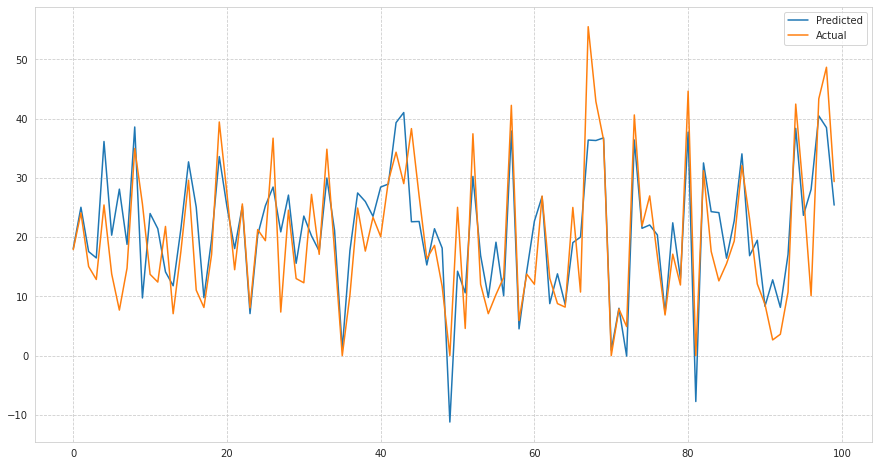

In [61]:
# line graph of actual and predictive values
plt.figure(figsize=(15,8))
plt.plot(test_pred_lr[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

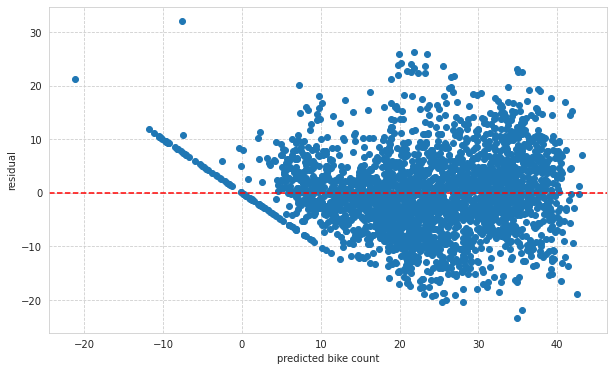

In [62]:
# Heteroskedasticity 
plt.figure(figsize=(10,6))
plt.axhline(y =0, color = 'r', linestyle= '--')
plt.scatter(test_pred_lr, y_test - test_pred_lr)
plt.xlabel('predicted bike count')
plt.ylabel('residual');

### ***ML Model - 2***

# **Lasso Regression**

#### Cross- Validation & Hyperparameter Tuning

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Cross-Validation
parameters = {'alpha' : [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, cv=5)
lasso_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [64]:
print("The best fit alpha value is found to be :", lasso_reg.best_params_)

The best fit alpha value is found to be : {'alpha': 0.0001}


In [65]:
# Prdiction on train and test datasets

train_pred_lasso = lasso_reg.predict(X_train)
test_pred_lasso = lasso_reg.predict(X_test)

## **Evaluation Metrics for Lasso Regression**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Train data Evaluation Metrics
evaluation_metrics(y_train, train_pred_lasso, model= 'Lasso', train=True)

MSE : 53.80611534623119
RMSE : 7.3352651858151106
MAE : 5.63804777968967
R2_score : 0.6540967679051862
Adjusted R2_score : 0.6525094490580972


In [67]:
# Test data Evaluation Metrics
evaluation_metrics(y_test, test_pred_lasso, model= 'Lasso', train=False)

MSE : 53.74016699398597
RMSE : 7.330768513190549
MAE : 5.661284867852185
R2_score : 0.6501247609565992
Adjusted R2_score : 0.6485192149265722


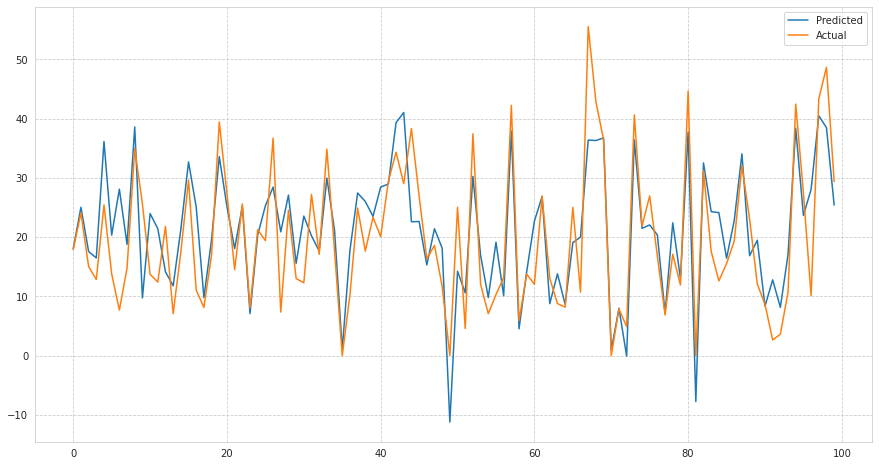

In [68]:
# line graph of actual and predictive values for Lasso Regression
plt.figure(figsize=(15,8))
plt.plot(test_pred_lasso[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

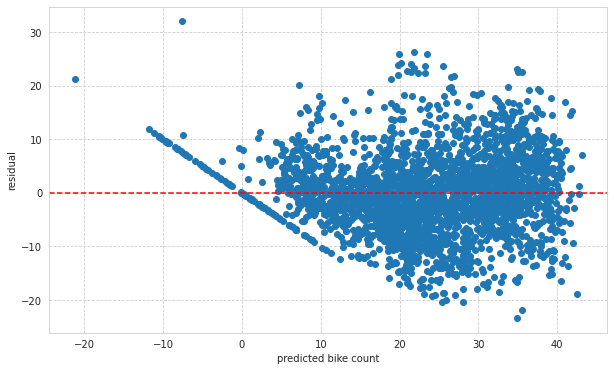

In [69]:
# Heteroskedasticity 
plt.figure(figsize=(10,6))
plt.axhline(y =0, color = 'r', linestyle= '--')
plt.scatter(test_pred_lasso, y_test - test_pred_lasso)
plt.xlabel('predicted bike count')
plt.ylabel('residual');

### ***ML Model - 3***

## **Ridge Regression**

#### Cross- Validation & Hyperparameter Tuning

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# Cross-Validation
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_reg = GridSearchCV(ridge, parameters, cv=5)
ridge_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]})

In [71]:
print("The best fit alpha value found to be :", ridge_reg.best_params_)

The best fit alpha value found to be : {'alpha': 1e-15}


In [72]:
# Prediction on train and test datset

train_pred_ridge = ridge_reg.predict(X_train)
test_pred_ridge = ridge_reg.predict(X_test)

## **Evaluation Metrics for Ridge Regression**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Evaluation metrics for train dataset(train_pred_ridge)
evaluation_metrics(y_train, train_pred_ridge, model='Ridge', train= True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952843
R2_score : 0.6540967727241054
Adjusted R2_score : 0.65250945389913


In [74]:
# Evaluation metrics for test dataset(test_pred_ridge)
evaluation_metrics(y_test, test_pred_ridge, model='Ridge', train= False)

MSE : 53.740491144516426
RMSE : 7.330790622062291
MAE : 5.661287586240899
R2_score : 0.6501226505752834
Adjusted R2_score : 0.6485170948609061


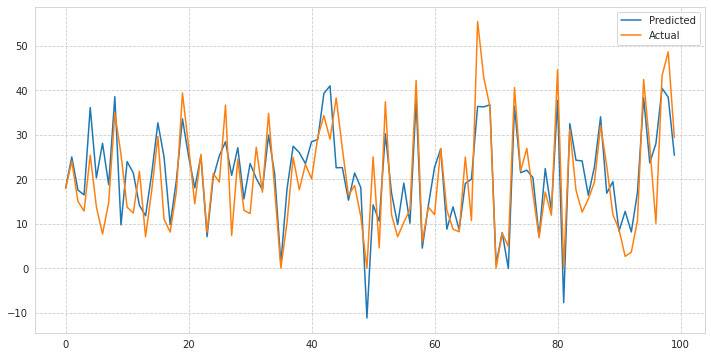

In [75]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_ridge[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

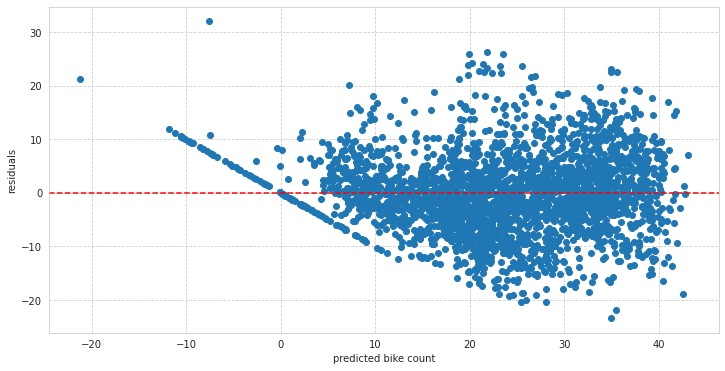

In [76]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_ridge, y_test- test_pred_ridge)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

### ***ML Model - 4***

## **Elastic Net Regression**

#### Cross- Validation & Hyperparameter Tuning

In [77]:
from sklearn.linear_model import ElasticNet
elasticnet_reg = ElasticNet()

# parameters 
en_params = {'alpha': [1e-15,1e-10,1e-5,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,100],
             'l1_ratio' : [0.1,0.2,0.3,0.4,0.5]}

en_grid = GridSearchCV(elasticnet_reg, en_params, cv= 5)
en_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [78]:
en_grid.best_params_

{'alpha': 1e-15, 'l1_ratio': 0.2}

In [79]:
en_model = en_grid.best_estimator_

In [80]:
# prediction on train and teest dataset
train_pred_en = en_grid.predict(X_train)
test_pred_en = en_grid.predict(X_test)

## **Evaluation Metrics for Elastic Net Regression**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# Train dataset evaluation metrics for 
evaluation_metrics(y_train, train_pred_en, model='ElasticNet', train=True)

MSE : 53.80611459663623
RMSE : 7.335265134719823
MAE : 5.638051729952843
R2_score : 0.6540967727241054
Adjusted R2_score : 0.65250945389913


In [82]:
# Test dataset evaluation metrics for 
evaluation_metrics(y_test, test_pred_en, model='ElasticNet', train=False)

MSE : 53.740491144516405
RMSE : 7.330790622062289
MAE : 5.661287586240901
R2_score : 0.6501226505752835
Adjusted R2_score : 0.6485170948609063


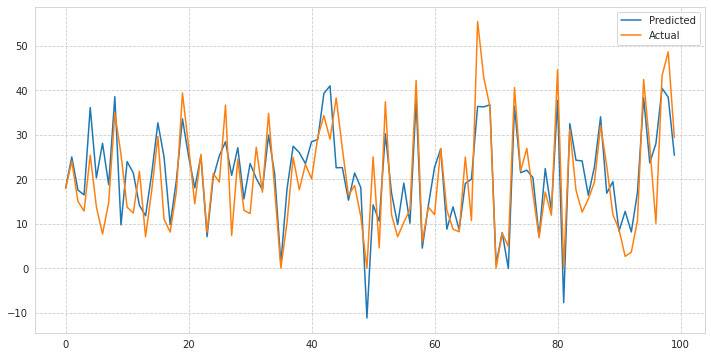

In [83]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_en[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

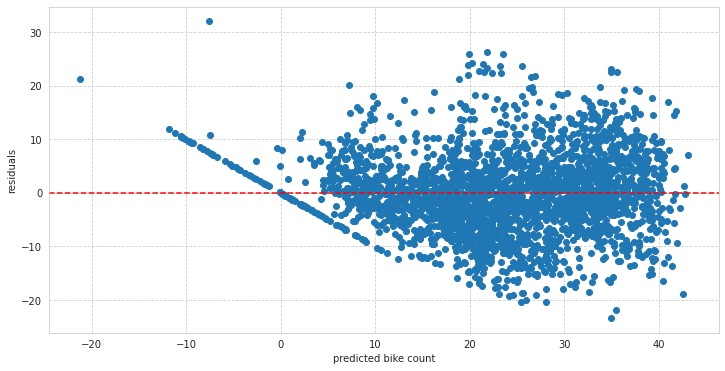

In [84]:
# Heteroskedasticity
plt.figure(figsize=(12,6))
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.scatter(test_pred_en, y_test- test_pred_en)
plt.xlabel('predicted bike count')
plt.ylabel('residuals');

### ***ML Model - 5***

## **Decision Tree Regressor**

In [85]:
from sklearn.tree import DecisionTreeRegressor

#### Cross- Validation & Hyperparameter Tuning

In [86]:
# Hyperparameter grid 
dtree_params = {"criterion": ["mse", "mae"],
             "max_depth": [5, 6, 7, 8],
             "min_samples_split": [10, 20, 40],
             "min_samples_leaf": [20, 40, 100]
              }

In [87]:
# create instance for DecisionTreeRegressor
dtree_reg = DecisionTreeRegressor()

# Grid Search
dtree_grid = GridSearchCV(estimator = dtree_reg, param_grid = dtree_params, cv = 5, verbose=2)

dtree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=20, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=2)

In [88]:
# best Parameters 
dtree_grid.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [89]:
dtree_optimal_model  = dtree_grid.best_estimator_

In [90]:
# Model score
dtree_optimal_model.score(X_train, y_train)

0.8613754775424959

In [91]:
# predictions on train and test data
train_pred_dtree = dtree_optimal_model.predict(X_train)
test_pred_dtree = dtree_optimal_model.predict(X_test)

## **Evaluation Metrics for Decision Tree**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# train data evaluation metrics
evaluation_metrics(y_train, train_pred_dtree, model= 'Decision Tree', train=True)

MSE : 21.56339216605
RMSE : 4.643639969468994
MAE : 3.218932170884279
R2_score : 0.8613754775424959
Adjusted R2_score : 0.8607393420665914


In [93]:
# test data evaluation metrics
evaluation_metrics(y_test, test_pred_dtree, model= 'Decision Tree', train=False)

MSE : 24.623417452837717
RMSE : 4.962198852609367
MAE : 3.4556336932227656
R2_score : 0.8396892948185077
Adjusted R2_score : 0.8389536433989369


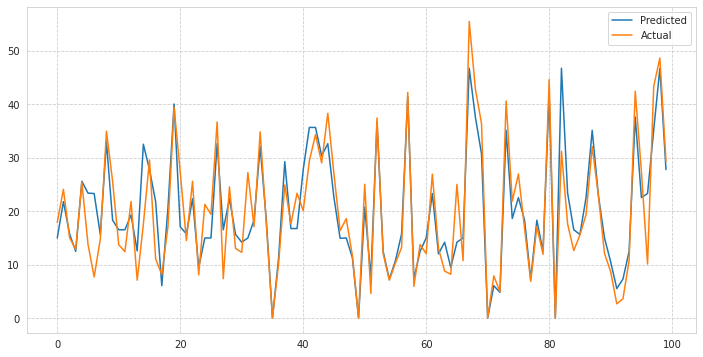

In [94]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_dtree[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importance**

In [95]:
dtree_optimal_model.feature_importances_

array([2.28746482e-01, 2.83530983e-01, 1.69522561e-01, 1.29193582e-04,
       4.96484172e-04, 3.60891331e-02, 1.91378840e-02, 1.44827097e-04,
       8.74705656e-02, 9.23499803e-04, 1.65381557e-01, 8.42683001e-03])

In [96]:
def plot_feature_importance(model,X):

  ''' plots feature importance graph '''


  importances = list(model.feature_importances_)

  feature_importances= {'feature':list(X.columns), 'feature_importance':importances}

  importance_df= pd.DataFrame(feature_importances)
  importance_df.sort_values(by='feature_importance', ascending=False, inplace=True)

  plt.figure(figsize=(12,6))
  sns.barplot(x='feature_importance', y='feature', data=importance_df)
  
  plt.xlabel("Importance")
  plt.tight_layout()

  plt.show()

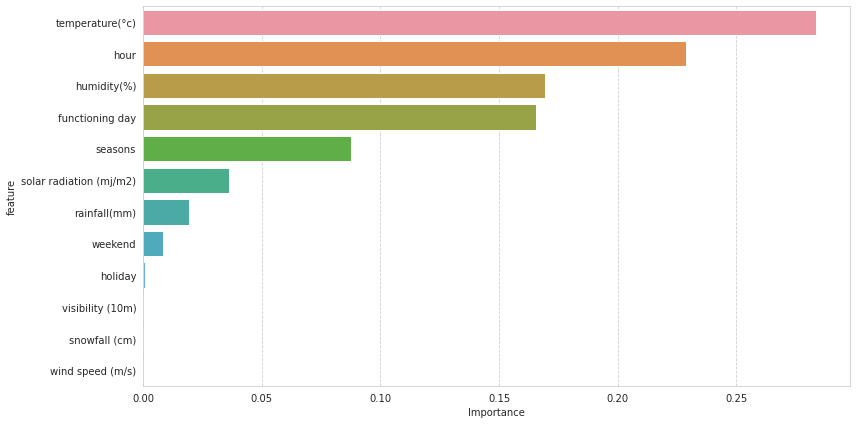

In [97]:
plot_feature_importance(dtree_optimal_model,X)

## **Decision Tree Visualization**

In [98]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

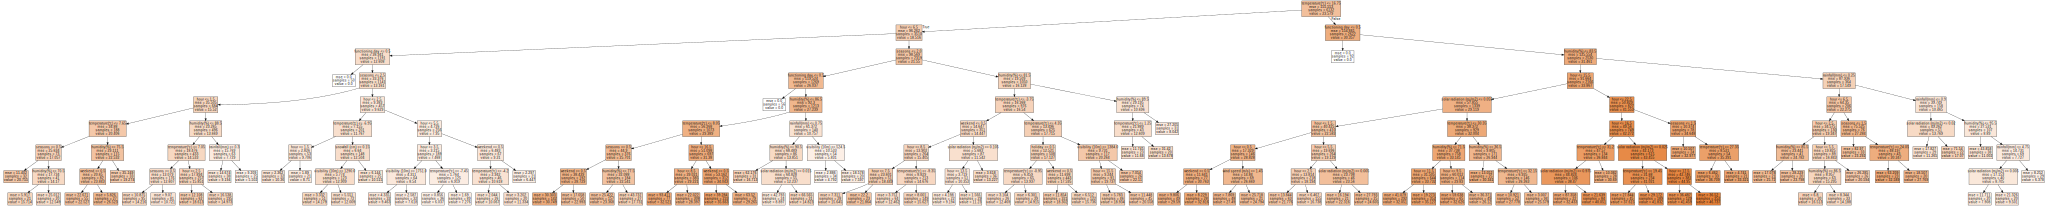

In [99]:
dot_data = tree.export_graphviz(dtree_optimal_model, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

### ***ML Model - 6***

## **Random Forest Regressor**

In [100]:
# importing Random Forst
from sklearn.ensemble import RandomForestRegressor

#### Cross- Validation & Hyperparameter Tuning

In [101]:
# hyperparameter grid for ranodm forest 
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
  }
  

In [102]:
# create regressor object
rf_reg= RandomForestRegressor()

# fitting gridsearch
rf_grid = GridSearchCV(estimator=rf_reg,
                       param_grid = rf_params,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [103]:
# evaluating best parameters
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [104]:
# Optimal model
rf_optimal_model = rf_grid.best_estimator_

In [105]:
# Model score 
rf_optimal_model.score(X_train,y_train)

0.8646691443222451

In [106]:
# Making predictions on train and test data
train_pred_rf = rf_optimal_model.predict(X_train)
test_pred_rf = rf_optimal_model.predict(X_test)

## **Evaluatio Metrics for Random Forest**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
# evaluation metrics for trai data
evaluation_metrics(y_train, train_pred_rf, model='Random Forest', train=True)

MSE : 21.051054037290747
RMSE : 4.588142765574187
MAE : 3.298009246980258
R2_score : 0.8646691443222451
Adjusted R2_score : 0.8640481231872037


In [108]:
# evaluation metrics for test data
evaluation_metrics(y_test, test_pred_rf, model='Random Forest', train=False)

MSE : 24.42641424869878
RMSE : 4.94230859504936
MAE : 3.5403574601578187
R2_score : 0.8409718837458577
Adjusted R2_score : 0.8402421180116131


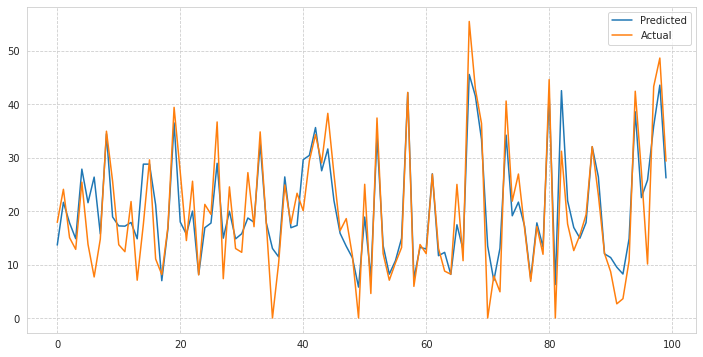

In [109]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_rf[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importances** 

In [110]:
rf_optimal_model.feature_importances_

array([0.26770977, 0.31545809, 0.11575002, 0.00090503, 0.0028776 ,
       0.03160424, 0.05463628, 0.00057936, 0.06474308, 0.00036957,
       0.1391186 , 0.00624836])

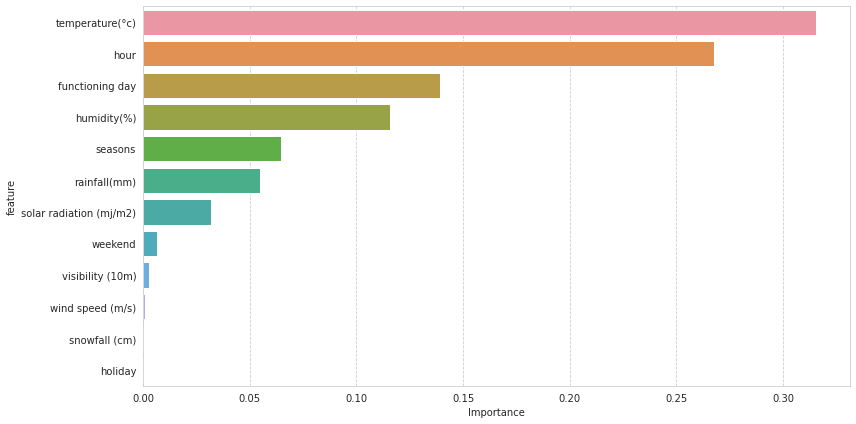

In [111]:
plot_feature_importance(rf_optimal_model,X)

### ***ML Model - 7***

## **Gradient Boosting Regressor**

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

#### Cross- Validation & Hyperparameter Tuning

In [113]:
# Hyperparameters for gradient boosting regressor
gb_params = {'n_estimators' : [50, 100, 150],
              'max_depth' : [5, 6, 7, 8],
              'min_samples_split' : [50, 80],
              'min_samples_leaf' : [40, 50]}

In [114]:
# creat an instance of the Gradient boosting regressor
gb_reg = GradientBoostingRegressor() 

# Applying GridSearchCV 
gb_grid = GridSearchCV(estimator=gb_reg,
                       param_grid = gb_params,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

# training the model
gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   1.2s
[CV] END max_depth=5, m

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [115]:
# # best parameters
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [116]:
gb_optimal_model = gb_grid.best_estimator_

In [117]:
# MOdel score
gb_optimal_model.score(X_train,y_train)

0.9683883120906536

In [118]:
# Prediction on train and test data
train_pred_gb = gb_optimal_model.predict(X_train)
test_pred_gb = gb_optimal_model.predict(X_test)

## **Evaluation Metrics for Gradient Boosting Regressor**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [119]:
# evaluation metrics on train data 
evaluation_metrics(y_train, train_pred_gb, model='Gradient Boosting', train= True)

MSE : 4.917277342679263
RMSE : 2.217493481992509
MAE : 1.4896685104851668
R2_score : 0.9683883120906536
Adjusted R2_score : 0.9682432488956585


In [120]:
# evaluation metrics of test data
evaluation_metrics(y_test, test_pred_gb, model='Gradient Boosting', train=False)

MSE : 10.055947834091977
RMSE : 3.1711114509099136
MAE : 2.080614590048388
R2_score : 0.9345307737384844
Adjusted R2_score : 0.934230341342638


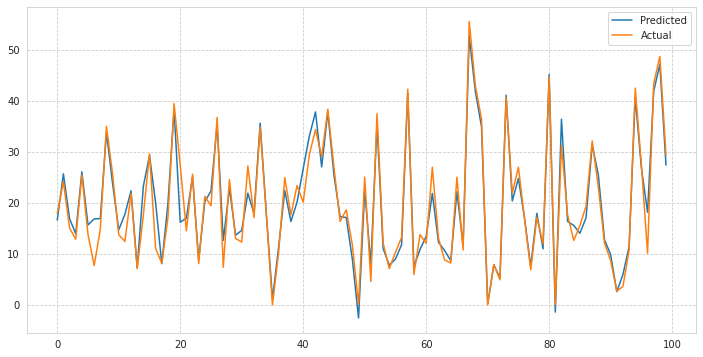

In [121]:
#  plotting the graphof actual and preddicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_gb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()


## **Feature Importance**

In [122]:
gb_optimal_model.feature_importances_

array([0.25046483, 0.2791216 , 0.11811762, 0.00376981, 0.00677295,
       0.04117742, 0.05988008, 0.00104953, 0.06393035, 0.00214075,
       0.15376927, 0.01980578])

In [123]:
# Obtaining feature names
gb_optimal_model.feature_names_in_

array(['hour', 'temperature(°c)', 'humidity(%)', 'wind speed (m/s)',
       'visibility (10m)', 'solar radiation (mj/m2)', 'rainfall(mm)',
       'snowfall (cm)', 'seasons', 'holiday', 'functioning day',
       'weekend'], dtype=object)

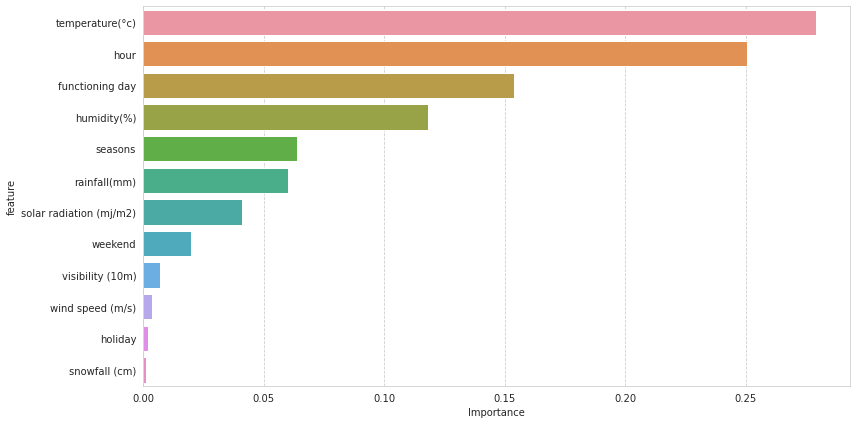

In [124]:
plot_feature_importance(gb_optimal_model,X)

### ***ML Model - 8***

## **XGBoost Regressor**

In [126]:
from xgboost import XGBRegressor

#### Cross- Validation & Hyperparameter Tuning

In [127]:
# Hyperparameters for XGBRegressor
xgb_params = {'max_depth':[5,6,7,8],
              'learning_rate':[0.05,0.1,0.2,0.3],
            'n_estimators':[80,100,150],
            'colsample_bytree':[0.5,0.7]
            }

In [128]:
# creating instance of XGBRegressor
xgb_reg = XGBRegressor()

# Grid Search 
xgb_grid = GridSearchCV(estimator= xgb_reg, param_grid= xgb_params, cv =3,
                        scoring= 'neg_mean_squared_error', verbose=2)

# training the model on the xgb_grid
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[04:02:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.5s
[04:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.4s
[04:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=80; total time=   0.4s
[04:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.5s
[04:02:21] WARNING: /workspac

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.05, 0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8],
                         'n_estimators': [80, 100, 150]},
             scoring='neg_mean_squared_error', verbose=2)

In [129]:
# evaluating the best parameters
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 150}

In [130]:
# creating best estimator model
xgb_optimal_model = xgb_grid.best_estimator_

In [131]:
# model score
xgb_optimal_model.score(X_train, y_train)

0.9810668825472272

In [132]:
# making prediction on train and test data
train_pred_xgb = xgb_optimal_model.predict(X_train)
test_pred_xgb = xgb_optimal_model.predict(X_test)

## **Evaluation Metrics for XGBoost Regressor**

#### Explaining the ML Model used and it's performance using Evaluation metric Score Chart.

In [133]:
# evaluation metric for train set
evaluation_metrics(y_train, train_pred_xgb, model='XG Boost', train=True)

MSE : 2.9450939077909637
RMSE : 1.7161275907667715
MAE : 1.1572887392163702
R2_score : 0.9810668825472272
Adjusted R2_score : 0.9809800001726829


In [134]:
# evaluation metric for test set
evaluation_metrics(y_test, test_pred_xgb, model='XG Boost', train=False)

MSE : 9.46132555407195
RMSE : 3.0759267796994045
MAE : 2.0349535013806364
R2_score : 0.9384020607850212
Adjusted R2_score : 0.9381193933775337


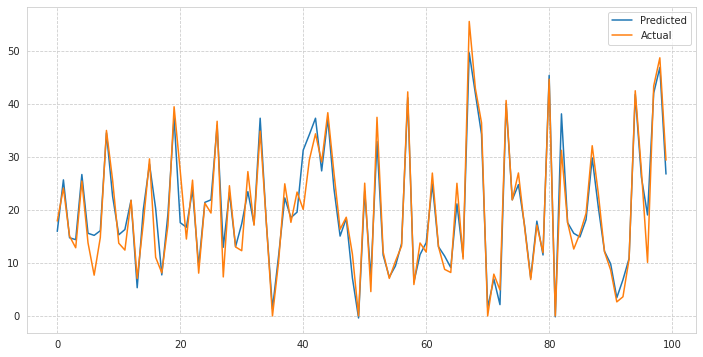

In [135]:
# line graph of actual and predicted values
plt.figure(figsize=(12,6))
plt.plot(test_pred_xgb[:100])
plt.plot(np.array(y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importance**

In [136]:
xgb_optimal_model.feature_importances_

array([0.05967771, 0.03959964, 0.0225222 , 0.00233621, 0.00463377,
       0.01484787, 0.07396486, 0.01492385, 0.0942665 , 0.00958638,
       0.6395014 , 0.02413966], dtype=float32)

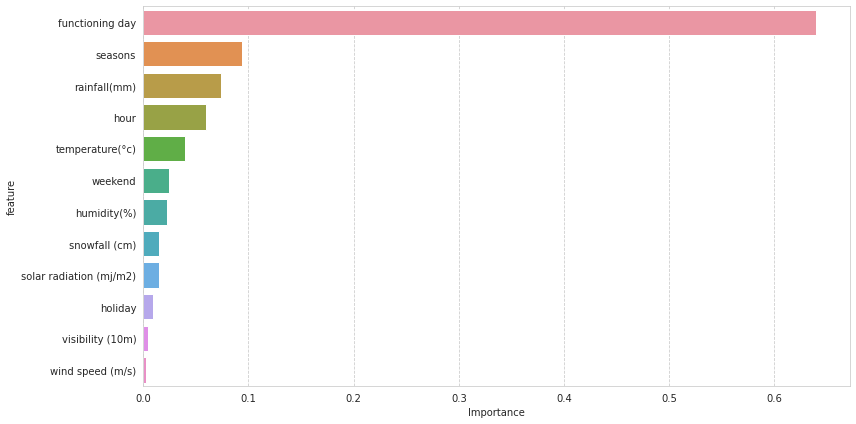

In [137]:
plot_feature_importance(xgb_optimal_model,X)

## **Results**

### **Saving all train and test results in DataFrame**


In [138]:
# Creating DataFrame fro all train results

train_result_df = pd.DataFrame(train_result).T.reset_index()
train_result_df.columns = ['Model','MSE','RMSE','MAE','R2_score','Adj_r2_score']
train_result_df

Model        MSE      RMSE       MAE  R2_score  Adj_r2_score
0             Linear  53.806115  7.335265  5.638052  0.654097      0.652509
1              Lasso  53.806115  7.335265  5.638048  0.654097      0.652509
2              Ridge  53.806115  7.335265  5.638052  0.654097      0.652509
3         ElasticNet  53.806115  7.335265  5.638052  0.654097      0.652509
4      Decision Tree  21.563392  4.643640  3.218932  0.861375      0.860739
5      Random Forest  21.051054  4.588143  3.298009  0.864669      0.864048
6  Gradient Boosting   4.917277  2.217493  1.489669  0.968388      0.968243
7           XG Boost   2.945094  1.716128  1.157289  0.981067      0.980980

In [139]:
# Creating DataFrame for all test results

test_result_df = pd.DataFrame(test_result).T.reset_index()
test_result_df.columns = ['Model','MSE','RMSE','MAE','R2_score','Adj_r2_score']
test_result_df

Model        MSE      RMSE       MAE  R2_score  Adj_r2_score
0             Linear  53.740491  7.330791  5.661288  0.650123      0.648517
1              Lasso  53.740167  7.330769  5.661285  0.650125      0.648519
2              Ridge  53.740491  7.330791  5.661288  0.650123      0.648517
3         ElasticNet  53.740491  7.330791  5.661288  0.650123      0.648517
4      Decision Tree  24.623417  4.962199  3.455634  0.839689      0.838954
5      Random Forest  24.426414  4.942309  3.540357  0.840972      0.840242
6  Gradient Boosting  10.055948  3.171111  2.080615  0.934531      0.934230
7           XG Boost   9.461326  3.075927  2.034954  0.938402      0.938119

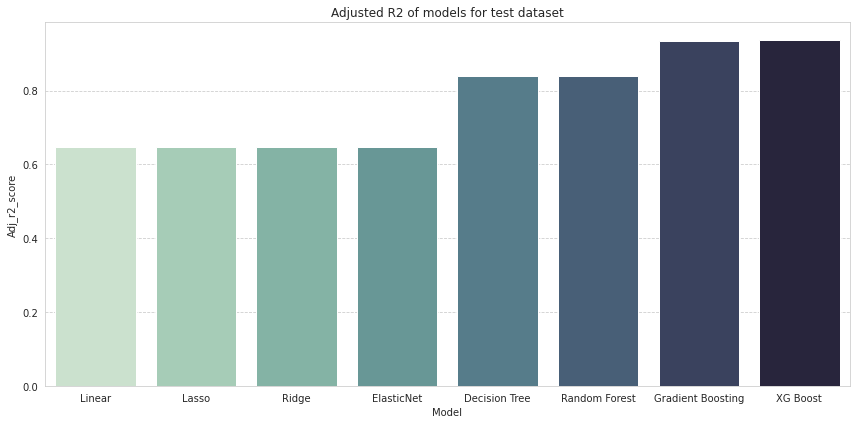

In [140]:
# plot Adjusted R2 of models for test dataset
plt.figure(figsize=(12,6))
sns.barplot(x='Model',y='Adj_r2_score', data=test_result_df, palette="ch:s=.25,rot=-.5")
plt.title("Adjusted R2 of models for test dataset")

plt.tight_layout();

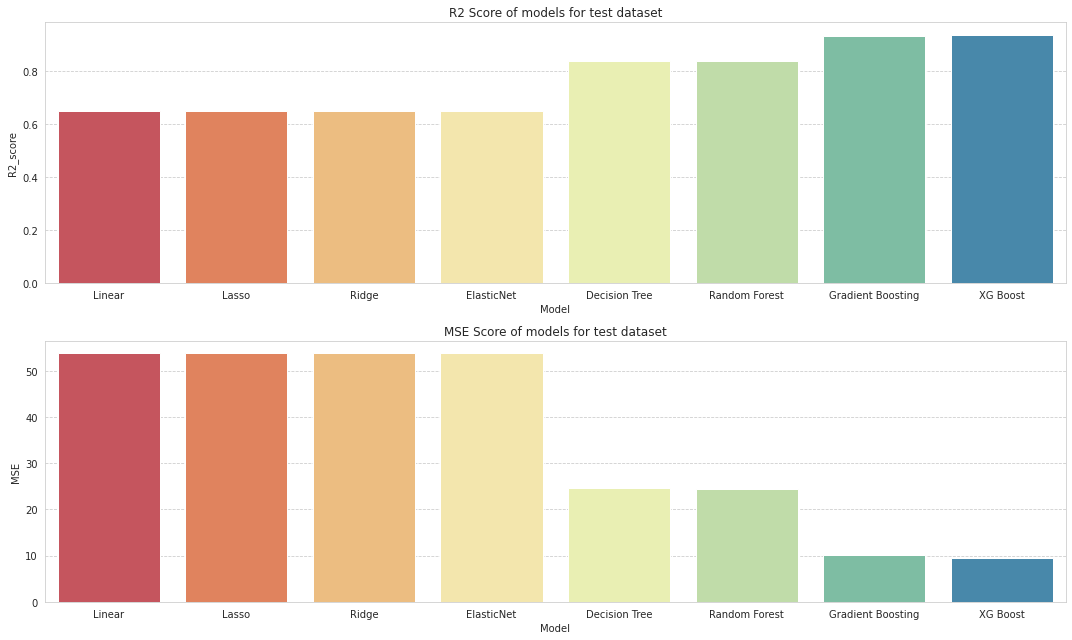

In [141]:
# plot R2 and MSE of Models for test dataset
fig, ax =plt.subplots(2,figsize=(15,9))
sns.barplot(x='Model', y='R2_score', data= test_result_df, palette='Spectral', ax= ax[0])
ax[0].set_title("R2 Score of models for test dataset")

sns.barplot(x='Model', y='MSE', data= test_result_df, palette='Spectral', ax= ax[1])
ax[1].set_title("MSE Score of models for test dataset")

plt.tight_layout()
plt.show()

## **XGBoost Model is found to be the Best Model**

### 1 Which Evaluation metrics did you consider for a positive business impact and why?
Answer -  
 R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer - 

* **Gradient Boosting** and **XGBoost** models are found to be the best models. Therefore, either Gradient Boosting or XGBoost model can be used to predict the number of bikes required at each hour.
* Because we found that the **R2 score** for these two models is found to be high , which tells us that **Gradient Boosting and XGboost models are best models**

# **Model Explainability**

In [142]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.2 MB/s eta 0:00:00


In [143]:
from sklearn.tree import export_graphviz
import shap
import graphviz
sns.set_style('darkgrid')

## **Shap for XGBoost**

In [144]:
observation_1 = 2

In [145]:
# individual SHAP value plot for observation 2 of train dataset
shap.initjs()

explainer = shap.TreeExplainer(xgb_optimal_model)
shap_values = explainer.shap_values(X_train)

shap.force_plot(explainer.expected_value, shap_values[observation_1], features=X_train.iloc[observation_1], feature_names=X_train.columns)

The output value is the prediction for that observation. Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Temperature has a positive impact on the rented bike count as it pushes it towards right.

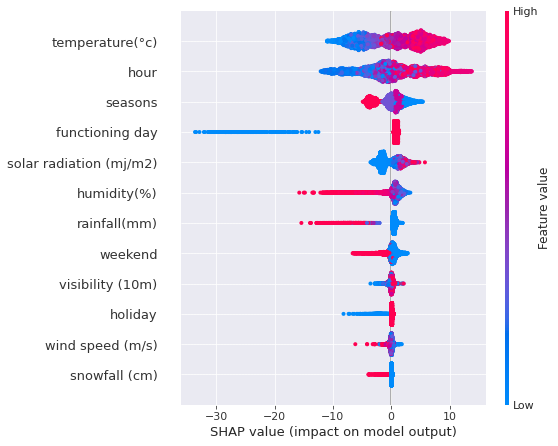

In [146]:
shap.summary_plot(shap_values, X_train)

This plot is made of all the dots un the train data. Variables are ranked in descending order. Color shows whether that variable is high or low for that observation.

A high level of temperature and hour has positive impact on the count of rental bikes. So, we can say that temperature and hour are most influential features for predicting bike count.

## ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [147]:
# loading dependency
# from sklearn.externals import joblib
import joblib

In [148]:
# saving our model # model - model , filename-model_jlib
joblib.dump(xgb_optimal_model , 'xgb_model_saved')

['xgb_model_saved']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [149]:
# Load the File and predict unseen data.
# opening the file- model_jlib
xgb_model_saved = joblib.load('xgb_model_saved')

[04:06:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [150]:
# check prediction
xgb_model_saved.score(X_test, y_test) #R2 Score

0.9384020607850212

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


Some of the facts that we can conclude from this data are:
* There is a huge demand for bike rents in the summer season while the least bike rents occur in winter.
* The demand for rental bikes is at peak at 8am and 6pm so we can say that demand is more during office opening and closing time.
* Non holidays have comparatively high demand for rented bikes as compared to holidays.
* Temperature and hour are the most influential features to predict the rental bike count.

The result shows the evaluation metrics- R-squared, Adjusted R2 showed highest value and MSE, RMSE showed lowest value for XGBoost model. Gradient Boosting and XGBoost models are found to be the best models. Therefore, either Gradient Boosting or XGBoost model can be used to predict the number of bikes required at each hour.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***